In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

df = pd.read_csv('testcpns.csv')

df.head()

,toefl,ipk,pengalaman_kerja,diterima
0,780,4.00,3,1
1,750,3.09,4,1
2,690,3.03,3,0
3,710,3.07,5,1
4,680,3.09,4,0


In [2]:
df.describe()

,toefl,ipk,pengalaman_kerja,diterima
count,40.000000,40.000000,40.000000,40.000000
mean,654.000000,2.694500,3.425000,0.475000
std,61.427464,0.653899,1.737778,0.505736
min,540.000000,1.070000,1.000000,0.000000
25%,607.500000,2.070000,2.000000,0.000000
50%,660.000000,3.030000,4.000000,0.000000
75%,690.000000,3.070000,5.000000,1.000000
max,780.000000,4.000000,6.000000,1.000000


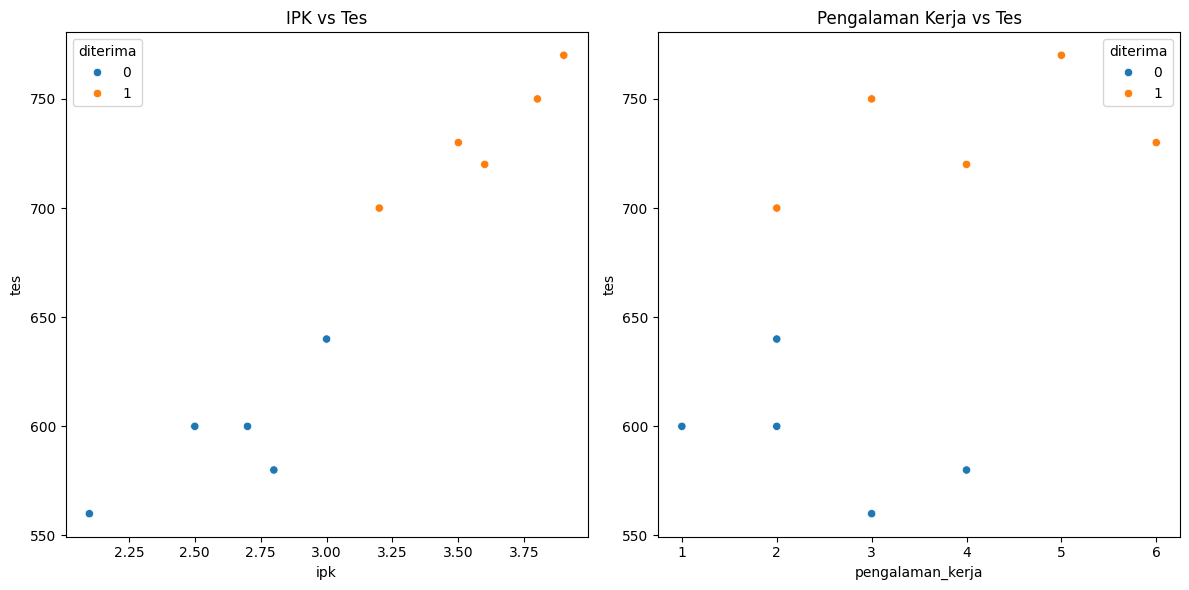

In [3]:
# Contoh data dummy (gantikan dengan data asli Anda)
data = {
    'ipk': [2.5, 3.2, 3.8, 2.8, 3.0, 3.9, 2.1, 3.5, 2.7, 3.6],
    'pengalaman_kerja': [1, 2, 3, 4, 2, 5, 3, 6, 2, 4],
    'tes': [600, 700, 750, 580, 640, 770, 560, 730, 600, 720],
    'diterima': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Buat dua scatter plot dalam satu baris
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Scatter plot IPK vs Tes
sns.scatterplot(data=df, x='ipk', y='tes', hue='diterima', ax=axs[0])
axs[0].set_title('IPK vs Tes')

# Scatter plot Pengalaman Kerja vs Tes
sns.scatterplot(data=df, x='pengalaman_kerja', y='tes', hue='diterima', ax=axs[1])
axs[1].set_title('Pengalaman Kerja vs Tes')

plt.tight_layout()
plt.show()

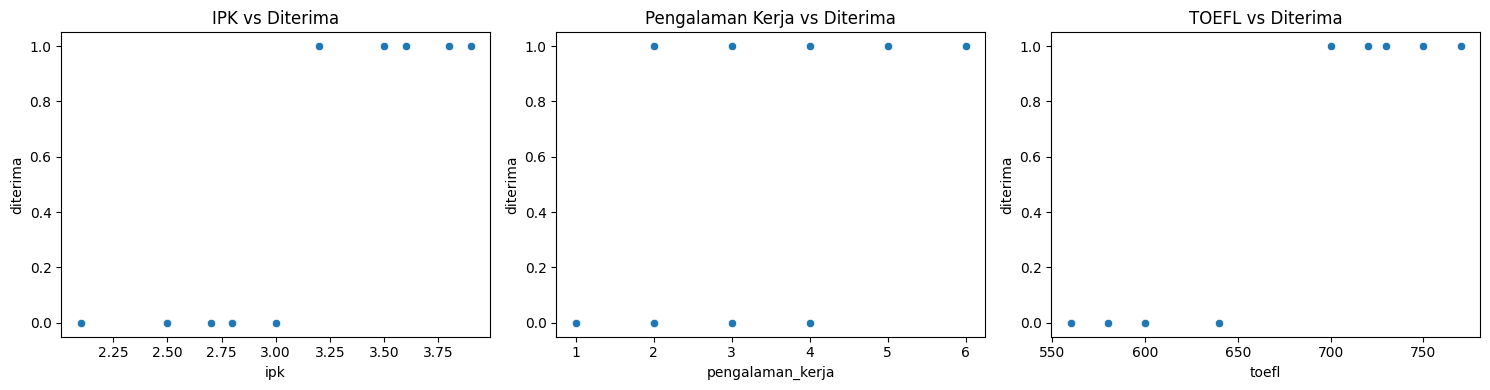

In [4]:
data = {
    'ipk': [2.5, 3.2, 3.8, 2.8, 3.0, 3.9, 2.1, 3.5, 2.7, 3.6],
    'pengalaman_kerja': [1, 2, 3, 4, 2, 5, 3, 6, 2, 4],
    'toefl': [600, 700, 750, 580, 640, 770, 560, 730, 600, 720],
    'diterima': [0, 1, 1, 0, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)

# Buat 3 subplot scatter
fig, axs = plt.subplots(1, 3, figsize=(15, 4))

# Scatter plot IPK vs Diterima
sns.scatterplot(data=df, x='ipk', y='diterima', ax=axs[0])
axs[0].set_title('IPK vs Diterima')

# Scatter plot Pengalaman Kerja vs Diterima
sns.scatterplot(data=df, x='pengalaman_kerja', y='diterima', ax=axs[1])
axs[1].set_title('Pengalaman Kerja vs Diterima')

# Scatter plot TOEFL vs Diterima
sns.scatterplot(data=df, x='toefl', y='diterima', ax=axs[2])
axs[2].set_title('TOEFL vs Diterima')

plt.tight_layout()
plt.show()

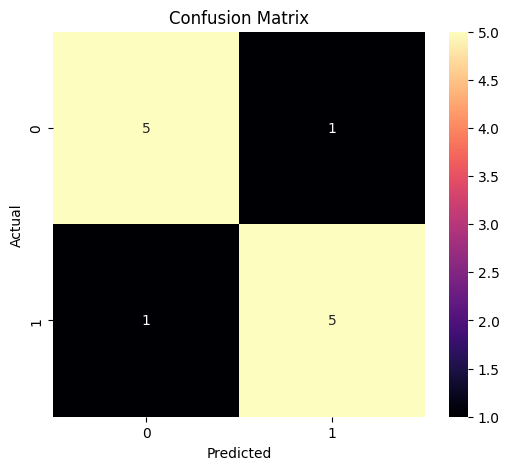

In [5]:
# Contoh label aktual dan prediksi
y_true = [0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]      # 6 negatif, 6 positif
y_pred = [0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1]      # 6 benar-negatif, 1 false-pos, 1 false-neg, 4 benar-positif

# Buat confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Visualisasi confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, cmap='magma', fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [6]:
import pandas as pd

# 1. Membaca file data CSV
try:
    df = pd.read_csv('testcpns.csv')
except FileNotFoundError:
    print("File 'testcpns.csv' tidak ditemukan. Pastikan file berada di direktori yang sama.")
    exit()

# 2. Menghitung Total Skor
# Menjumlahkan skor dari setiap tes untuk mendapatkan total skor
df['total_skor'] = df['toefl'] + df['ipk'] * 100 + df['pengalaman_kerja'] * 10

# 3. Menentukan Status Kelulusan
# Menetapkan nilai ambang batas (passing grade) untuk setiap jenis tes
passing_grade_toefl = 600
passing_grade_ipk = 3.0
passing_grade_pengalaman_kerja = 3

# Membuat kondisi untuk status kelulusan
# Peserta harus lulus SEMUA tes untuk dinyatakan 'LULUS'
kondisi_lulus = (
    (df['toefl'] >= passing_grade_toefl) &
    (df['ipk'] >= passing_grade_ipk) &
    (df['pengalaman_kerja'] >= passing_grade_pengalaman_kerja)
)

# Menerapkan kondisi untuk membuat kolom baru 'status_kelulusan'
df['status_kelulusan'] = kondisi_lulus.apply(lambda x: 'LULUS' if x else 'TIDAK LULUS')

# 4. Menghitung Agregat Data untuk Dasbor
total_peserta = len(df)
total_lulus = df['status_kelulusan'].value_counts().get('LULUS', 0)
total_tidak_lulus = total_peserta - total_lulus
persentase_kelulusan = (total_lulus / total_peserta) * 100 if total_peserta > 0 else 0

# 5. Membuat Sebaran Skor (Binning)
# Membuat rentang skor untuk visualisasi distribusi
bins = [250, 300, 350, 400, 450, 500]
labels = ['250 - 299', '300 - 349', '350 - 399', '400 - 449', '450 - 500']
df['rentang_skor'] = pd.cut(df['total_skor'], bins=bins, labels=labels, right=False)
sebaran_skor = df['rentang_skor'].value_counts().sort_index()

print("---" * 15)
print("Detail Data Peserta Ujian (Contoh 10 Baris Pertama)")
print("---" * 15)
# Menampilkan kolom yang relevan saja untuk keringkasan
kolom_tampil = ['toefl', 'ipk', 'pengalaman_kerja', 'total_skor', 'status_kelulusan']
print(df[kolom_tampil].head(10).to_string(index=False))

---------------------------------------------
Detail Data Peserta Ujian (Contoh 10 Baris Pertama)
---------------------------------------------
 toefl  ipk  pengalaman_kerja  total_skor status_kelulusan
   780 4.00                 3      1210.0            LULUS
   750 3.09                 4      1099.0            LULUS
   690 3.03                 3      1023.0            LULUS
   710 3.07                 5      1067.0            LULUS
   680 3.09                 4      1029.0            LULUS
   730 3.07                 6      1097.0            LULUS
   690 2.03                 1       903.0      TIDAK LULUS
   720 3.03                 4      1063.0            LULUS
   740 3.03                 5      1093.0            LULUS
   690 1.07                 1       807.0      TIDAK LULUS


In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import numpy as np

# --- Langkah 1: Membuat Data Latih (Contoh Sintetis) ---
# Di dunia nyata, Anda akan memuat data ini dari file, contoh:
# data_latih = pd.read_csv('data_pelamar.csv')
print("--- Membuat Contoh Data Latih ---")
data = {
    'toefl': [550, 620, 700, 580, 720, 650, 600, 750, 680, 590, 710, 630, 670, 560, 730, 690, 610, 640, 740, 660],
    'ipk': [2.8, 3.1, 3.8, 2.9, 3.9, 3.5, 3.0, 4.0, 3.6, 3.2, 3.7, 3.3, 3.4, 2.7, 3.9, 3.8, 3.1, 3.2, 3.9, 3.4],
    'pengalaman_kerja': [1, 3, 5, 2, 6, 4, 2, 7, 5, 2, 6, 4, 5, 1, 8, 6, 3, 3, 7, 5],
    'status_diterima': [0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1]  # 0 = Tidak Diterima, 1 = Diterima
}
data_latih = pd.DataFrame(data)
print("Data Latih (Sintetis):")
print(data_latih)
print("\n")


# --- Langkah 2: Memisahkan Fitur (X) dan Target (y) ---
# Fitur adalah variabel input, target adalah hasil yang ingin diprediksi.
X = data_latih[['toefl', 'ipk', 'pengalaman_kerja']]
y = data_latih['status_diterima']

# Normalisasi data fitur sangat penting untuk model seperti Regresi Logistik
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# --- Langkah 3: Melatih Model Regresi Logistik ---
print("--- Melatih Model ---")
model = LogisticRegression(random_state=42)
model.fit(X_scaled, y)
print("Model berhasil dilatih.")
print("\n")


# --- Langkah 4: Mempersiapkan Data Baru dan Melakukan Prediksi ---
print("--- Memprediksi Data Pelamar Baru ---")
# Data baru yang ingin diprediksi
pelamar_baru_data = {
    'toefl': [590, 740, 680, 610, 710],
    'ipk': [2.0, 3.07, 3.03, 2.03, 3.0], # Memperbaiki ipk 740,03.07 -> 3.07, dst
    'pengalaman_kerja': [3, 4, 6, 1, 5]
}
pelamar_baru_df = pd.DataFrame(pelamar_baru_data)

print("Data Pelamar Baru:")
print(pelamar_baru_df)
print("\n")

# Gunakan scaler yang SAMA dari data latih untuk mentransformasi data baru
pelamar_baru_scaled = scaler.transform(pelamar_baru_df)

# Lakukan prediksi
prediksi = model.predict(pelamar_baru_scaled)
prediksi_proba = model.predict_proba(pelamar_baru_scaled) # Probabilitas diterima

# Menambahkan hasil prediksi ke DataFrame untuk tampilan yang lebih baik
pelamar_baru_df['prediksi_status'] = ['Diterima' if p == 1 else 'Tidak Diterima' for p in prediksi]
pelamar_baru_df['probabilitas_diterima'] = [f"{p[1]*100:.2f}%" for p in prediksi_proba]


# --- Menampilkan Hasil Akhir ---
print("--- Hasil Prediksi ---")
print(pelamar_baru_df.to_string())

--- Membuat Contoh Data Latih ---
Data Latih (Sintetis):
    toefl  ipk  pengalaman_kerja  status_diterima
0     550  2.8                 1                0
1     620  3.1                 3                0
2     700  3.8                 5                1
3     580  2.9                 2                0
4     720  3.9                 6                1
5     650  3.5                 4                1
6     600  3.0                 2                0
7     750  4.0                 7                1
8     680  3.6                 5                1
9     590  3.2                 2                0
10    710  3.7                 6                1
11    630  3.3                 4                1
12    670  3.4                 5                1
13    560  2.7                 1                0
14    730  3.9                 8                1
15    690  3.8                 6                1
16    610  3.1                 3                0
17    640  3.2                 3           